In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#loading the data into numpy arrays
X = np.load("X.npy")
y = np.load("Y.npy")

In [3]:
#Gathering info about the data
print(X.shape, y.shape)

(2062, 64, 64) (2062, 10)


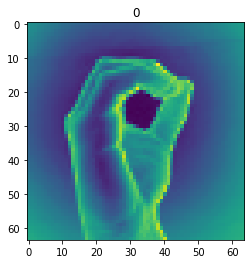

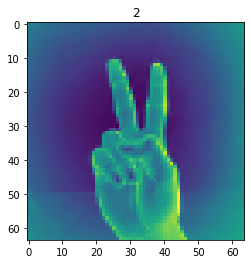

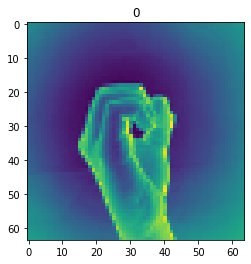

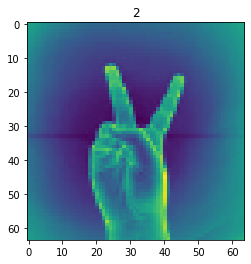

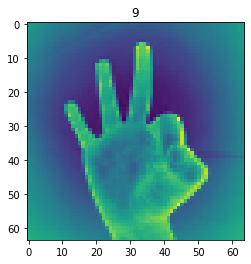

In [4]:
#sampling 5 random images from the dataset
#the titles are the respective digits for the sign language representation

for i in range(5):
    k = np.random.randint(low=0, high=2062)
    plt.imshow(X[k,:,:])
    plt.title(np.argmax(y[k,:]))
    plt.show()

In [5]:
#reshaping X from (2062,64,64)->(2062,4096) for compatibility purposes
X = X.reshape(X.shape[0], 4096)
X.shape

(2062, 4096)

In [6]:
#creating the NN model

model = Sequential(
    [
        tf.keras.Input(shape=(4096,),),
        Dense(80, activation="relu"),
        Dense(40, activation="relu"),
        Dense(20, activation="relu"),
        Dense(10, activation="linear")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                327760    
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 332,030
Trainable params: 332,030
Non-trainable params: 0
_________________________________________________________________


In [7]:
#label is 2D, but TF needs the labels in 1D. Converting the 2d labels in 1D
m = y.shape[0]

for i in range(m):
    y[i,0] = np.argmax(y[i,:])

y = np.delete(y, np.s_[1:10], axis=1)
y = np.asarray(y).reshape(-1)


(2062,)

In [8]:
y.shape

(2062,)

In [9]:
#splitting X and y into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)

print(f"Shape of X_train and X_test: {X_train.shape, X_test.shape}")
print(f"Shape of y_train and y_test: {y_train.shape, y_test.shape}")

Shape of X_train and X_test: ((1958, 4096), (104, 4096))
Shape of y_train and y_test: ((1958,), (104,))


In [ ]:
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.0001)
)

model.fit(X_train, y_train, epochs=50)